In [1]:
pkg load io
pkg load signal
pkg load control
e4init 

disp('New privately owned housing units started')
house=csvread(
"./MY_DATA/house.csv");
house=house(98:781,2);
size(house)
house=log(house);


                      EEEEEEEEE   444  444
                     EEEEEEEEEEE  444  444
                     EEE          44444444
                     EEE           4444444
                     EEEEEEE           444
                     EEEEEEE           444
                     EEE
                     EEE
                     EEEEEEEEEE
                      EEEEEEEE

Toolbox for State Space Estimation of Econometric Models
                   Version  JAN-2012

Web: www.ucm.es/info/icae/e4
    sete4opt at line 36 column 44
    e4init at line 48 column 1

 
*********************** Options set by user ********************
Filter. . . . . . . . . . . . . : KALMAN
Scaled B and M matrices . . . . : NO
Initial state vector. . . . . . : AUTOMATIC SELECTION
Initial covariance of state v.  : IDEJONG
Variance or Cholesky factor? .  : VARIANCE
Optimization algorithm. . . . . : BFGS
Maximum step length . . . . . . : 0.100000
Stop tolerance. . . . . . . . . : 0.000010
Max. number of iterations . 

In [2]:
window=31 % window of 2.5 years (30 months)
trendhouse=movmean(house,window);

window = 31


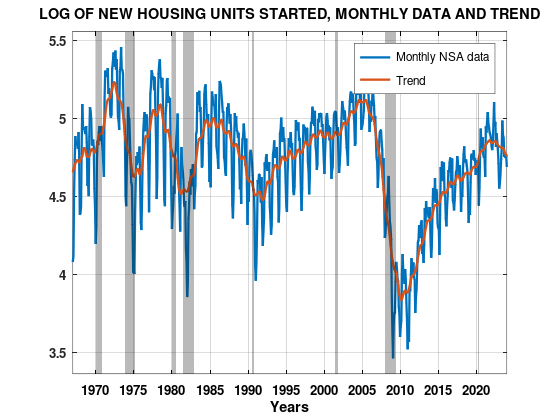

In [3]:
figure(1)

startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendhouse));  % Generate dates
dates = dates';

plot(dates, [house, trendhouse], 'linewidth', 2.3)
grid on
title('LOG OF NEW HOUSING UNITS STARTED, MONTHLY DATA AND TREND','FontSize',25)

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 20 , 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 4, 1);     % February 2020 to March 2020
];
ylim([min(house) - 0.1, max(house) + 0.1]);  % Adjust as needed
y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end

legend({'Monthly NSA data', 'Trend'}, 'FontSize', 30);

hold off;

In [4]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1967,1,684); % last input = number of rows of dataset
time=time(3:end,:); % start from third obs since we need the time of differenced trend (1st obs = stringname obs)
disp('FIRST DIFFERENCE OF TREND')
dtrendhouse=diff(trendhouse); % first difference of trend vector
time(5,:)
house(5)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans = 1967-06-01  
ans = 4.8828


In [5]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrechouse = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dtrendhouse) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendhouse(i:i+window-1) < 0) && dtrendhouse(i-1) > 0 
        confirmedrechouse = [confirmedrechouse, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedrechouse = confirmedrechouse'; % to column vector from row vector 
size(dtrendhouse); % the vector we are using
size(time); % checking time vector size
recessiontimehouse = time(confirmedrechouse,:); % DATES OF CONFIRMED RECESSION
recessionhouse = dtrendhouse(confirmedrechouse,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [6]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexphouse = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dtrendhouse) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendhouse(i:i+window-1) > 0) && dtrendhouse(i-1) < 0 
        confirmedexphouse = [confirmedexphouse, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexphouse = confirmedexphouse'; % to column vector from row vector 
size(dtrendhouse); % the vector we are using
size(time); % checking time vector size
expansiontimehouse = time(confirmedexphouse,:); % DATES OF CONFIRMED EXPANSION
expansionhouse = dtrendhouse(confirmedexphouse,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendhouse));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrechouse and confirmedexphouse indices to dates
recessionindhouse = dates(confirmedrechouse);
expansionindhouse = dates(confirmedexphouse);
size(dates);
size(dtrendhouse);

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


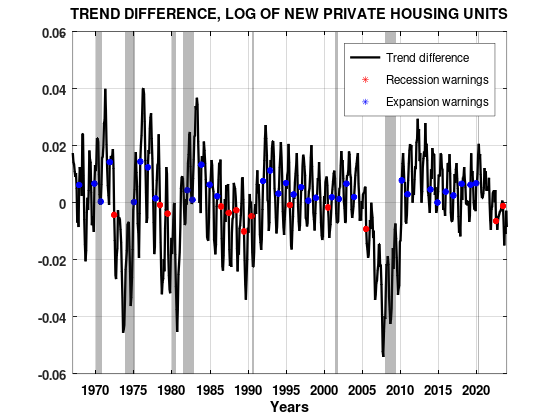

In [7]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(2)
plot(dates,dtrendhouse,'k','linewidth',2.3)
hold on
plot(recessionindhouse, recessionhouse, 'r*', 'linewidth', 2.3); % red are recessions
plot(expansionindhouse, expansionhouse, 'b*', 'linewidth', 2.3); % blue are expansions
grid on

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 20, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 4, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end

title('TREND DIFFERENCE, LOG OF NEW PRIVATE HOUSING UNITS','FontSize',25)
legend({'Trend difference', 'Recession warnings','Expansion warnings'}, 'FontSize', 30);

hold off;